In [1]:
import numpy as np
import pandas as pd




In [2]:
!pip install librosa 

In [3]:
!pip install librosa --user



In [4]:
!pip install python_speech_features

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5907 sha256=112b956f2ffbe1de979407edfb24fbcc08f6c0bc50bca117ffd4d4ca5bf3471a
  Stored in directory: c:\users\srich\appdata\local\pip\cache\wheels\6f\9d\a4\f98b63d53ed4f9ea88655dac2933a0d2c5a18b2d3e9447d0b0
Successfully built python_speech_features


  DEPRECATION: Building 'python_speech_features' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'python_speech_features'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [5]:
import librosa
import librosa.display
from python_speech_features import mfcc
import matplotlib.pyplot as plt


Mel-frequency cepstral coefficients (MFCCs) are a widely used feature representation in speech and audio signal processing. MFCCs are derived from the short-time Fourier transform (STFT) of an audio signal and are used to capture the characteristics of the spectral envelope of the signal. Here we are using audio sample rate of 22.5khz. Below are thr steps to compute Mfcc:
1) Framing : The continuous audio signal is divided into short overlapping frames, typically around 20-40 milliseconds in duration.
2) WIndowing : Each frame is multiplied with hamming or hanning window to avoid spectral leakage.
3) Fast Fourier Transform : The FFT is applied to each framed signal to convert it from the time domain to the frequency domain.
4) Mel Filter Bank  : The power spectrum is passed through a set of Mel filters, which are triangular filters that are spaced more densely at lower frequencies and less densely at higher frequencies. They mimic human auditory system.
5) Logarithmic Scaling: The logarithm of the filter bank energies is taken to mimic the human perception of loudness on a logarithmic scale.
6) Discrete cosine transform: The Discrete cosine transform is applied to decorrelate the coefficients and retain a compact representation.

Why mfcc with zeroth coefficient as energy coefficient ?
1) The energy coefficient can help mitigate the impact of noise in the signal. In noisy environments, frames with low energy are likely to contain more noise, and the energy coefficient helps in distinguishing between signal and noise.
2) The energy coefficient can serve as a form of normalization. It helps in normalizing variations in speech intensity and loudness across different speakers and recording conditions.
3) Different speakers may have different speaking styles and vocal characteristics. The energy coefficient helps in capturing speaker-specific information.
4) It can also capture temporal variations in the speech signal.


In [6]:
def compute_mfcc(file, num_cepstral_coeff = 13,energy = False):
    signal, rate= librosa.load(file)
    mfccs = librosa.feature.mfcc(y=signal, sr=rate, n_mfcc=num_cepstral_coeff)
    if energy:
        mfccs[0,:]= np.log(np.sum(np.square(signal)))
    return mfccs

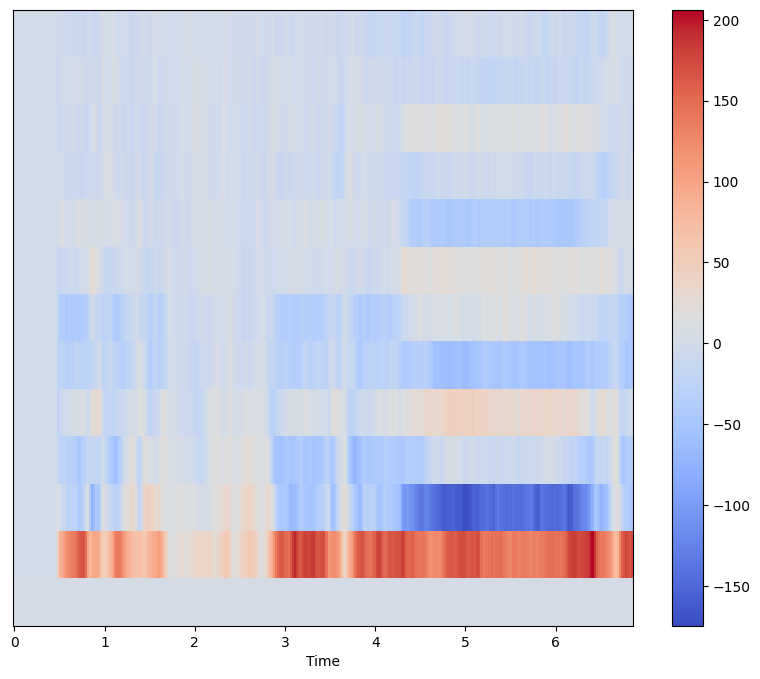

In [7]:
audio_file = '../dataset1/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'
mfcc_with_energy = compute_mfcc(audio_file,13,True)
plt.figure(figsize=(10,8))
librosa.display.specshow(mfcc_with_energy, x_axis='time')
plt.colorbar()
plt.show()


### Chroma features
Chroma features in audio analysis represent the distribution of energy in different pitch classes, 
essentially capturing the tonal content of the audio signal. The most common representation of chroma features is the chromagram, which is a 12-element vector corresponding to the 12 different pitch classes in Western music. Chroma features are computed by first transforming the audio signal into a time-frequency representation (e.g., using the short-time Fourier transform) and then summarizing the energy in each pitch class.

**How they are different from mfcc?**
1) Chroma features focus on the distribution of energy in different pitch classes and are particularly suited for music-related tasks while MFCCs, on the other hand, capture the overall spectral shape of an audio signal.
2) Chroma features are often used in tasks related to music analysis, such as chord recognition and key estimation on the other hand MFCCs are commonly used in speech processing tasks.


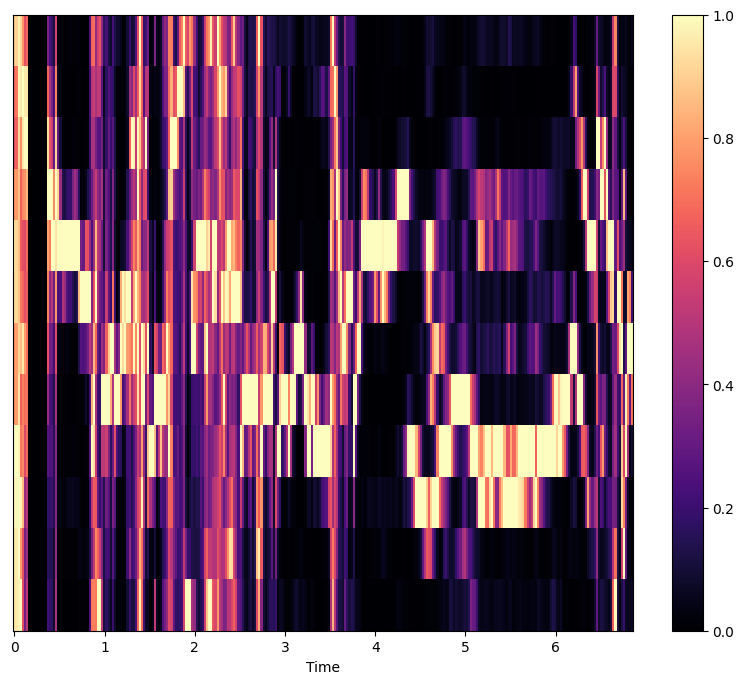

In [8]:
def compute_chroma_features(file):
    signal,rate = librosa.load(file)
    chroma = librosa.feature.chroma_stft(y=signal,sr=rate)

    return chroma

audio_file = '../dataset1/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'
chroma = compute_chroma_features(audio_file)
plt.figure(figsize=(10,8))
librosa.display.specshow(chroma , x_axis='time')
plt.colorbar()
plt.show()


### Spectral Contrast
Spectral contrast is another type of feature commonly used in audio signal processing. It measures the difference in magnitude between peaks and valleys in the spectrum of an audio signal and can provide information about the spectral texture or emphasis of different frequency bands. Spectral contrast is particularly useful for tasks like music genre classification and audio scene analysis.

### Differences from Other Features:

1) Mel-Frequency Cepstral Coefficients (MFCCs):
 * Spectral contrast captures the difference in magnitudes between peaks and valleys, emphasizing the texture or contrast in different frequency regions.
 * MFCCs, on the other hand, represent the overall spectral shape and are less sensitive to fine details in the spectrum.

2)  Chroma Features:
 * Chroma features focus on capturing the distribution of energy across pitch classes in the audio signal.
 * Spectral contrast, on the other hand, emphasizes the contrast in magnitude between peaks and valleys in different frequency bands.

In [9]:
def compute_spectral_contrast(audio_file):
 
    signal, rate = librosa.load(audio_file)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=rate)

    return spectral_contrast

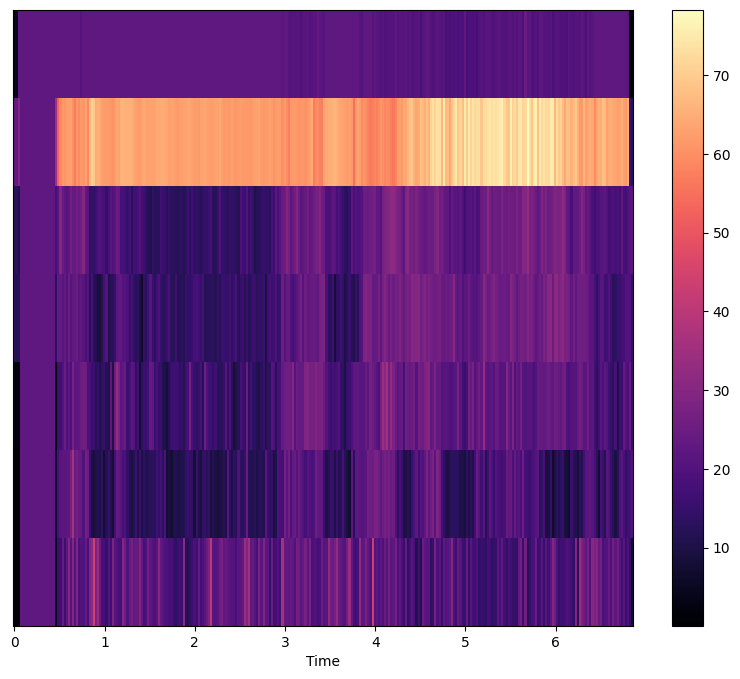

In [10]:
audio_file = '../dataset1/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'
spectral_contrast = compute_spectral_contrast(audio_file)
plt.figure(figsize=(10,8))
librosa.display.specshow(spectral_contrast , x_axis='time')
plt.colorbar()
plt.show()